In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Time array
t = np.arange(0, 15, 0.01)
len(t)

# Final time T
T = 15
Tsq = np.power(T, 2)
Tcb = np.power(T, 3)

In [ ]:
# Initialize matrix A
A = np.array([
    [1, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0],
    [1, T, Tsq, Tcb, 0, 0, 0, 0],
    [0, 1, 2*T, 3*Tsq, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, T, Tsq, Tcb],
    [0, 0, 0, 0, 0, 1, 2*T, 3*Tsq]
])

# Initialize vector b with initial and final conditions for position and velocity
b = np.array([
    [0],    # Initial position X
    [0],    # Initial velocity X
    [0],    # Initial position Y
    [-0.5], # Initial velocity Y
    [5],    # Final position X
    [0],    # Final velocity X
    [5],    # Final position Y
    [-0.5]  # Final velocity Y
])

In [ ]:
# Calculate the pseudo-inverse of matrix A
A_inv = np.linalg.pinv(A)

# Calculate polynomial coefficients x = A_inv * b
x = np.matmul(A_inv, b)

In [ ]:
# Extract polynomial coefficients
a11, a12, a13, a14 = x[0], x[1], x[2], x[3]
a21, a22, a23, a24 = x[4], x[5], x[6], x[7]

In [ ]:
# Calculate the desired trajectory for X and Y coordinates
X_new = a11 + a12 * t + a13 * np.power(t, 2) + a14 * np.power(t, 3)
Y_new = a21 + a22 * t + a23 * np.power(t, 2) + a24 * np.power(t, 3)

In [ ]:
# Calculate the second derivatives
Xdd = np.gradient(np.gradient(X_new, t), t)
Ydd = np.gradient(np.gradient(Y_new, t), t)

# Calculate the angle theta
theta = np.arctan2(np.gradient(Y_new, t), np.gradient(X_new, t))

In [ ]:
# Calculate the speed
V = np.sqrt(np.gradient(X_new, t)**2 + np.gradient(Y_new, t)**2)

# Calculate the acceleration and angular velocity
a = np.cos(theta) * Xdd + np.sin(theta) * Ydd
omega = (-np.sin(theta) * Xdd + np.cos(theta) * Ydd) / V

In [ ]:
# Initialize final states
x_final = X_new[0]
y_final = Y_new[0]
theta_final = theta[0]
V_final = V[0]

In [ ]:
# Initialize lists to hold robot's states
x_states = [x_final]
y_states = [y_final]

In [ ]:
# Calculate robot trajectory
for i in range(1, len(t)):
    dt = t[i] - t[i - 1]  # Calculate time step

    # Update final states
    x_final += V_final * np.cos(theta_final) * dt
    y_final += V_final * np.sin(theta_final) * dt
    theta_final += omega[i] * dt
    V_final += a[i] * dt

    # Append updated states to the lists
    x_states.append(x_final)
    y_states.append(y_final)

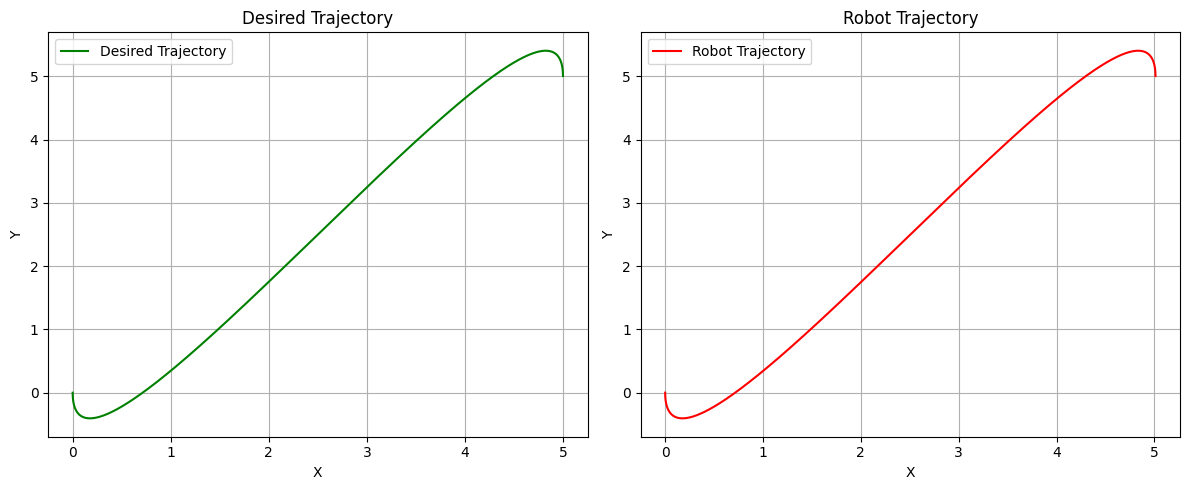

In [ ]:
# Visualize the desired trajectory and robot trajectory
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Desired trajectory
ax1.plot(X_new, Y_new, label='Desired Trajectory', color='green')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.legend()
ax1.set_title('Desired Trajectory')
ax1.grid(True)

# Robot trajectory
ax2.plot(x_states, y_states, label='Robot Trajectory', color='red')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.legend()
ax2.set_title('Robot Trajectory')
ax2.grid(True)

# plots
plt.tight_layout()
plt.show()

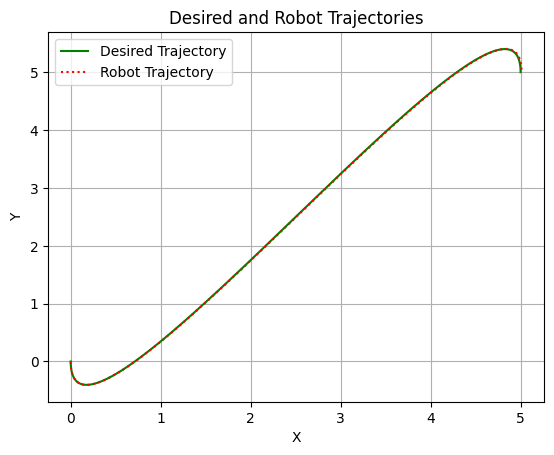

In [ ]:
# Plot the desired and robot trajectories
plt.figure()
plt.plot(X_new, Y_new, label='Desired Trajectory', color='green')
plt.plot(x_states, y_states, label='Robot Trajectory', linestyle='dotted', color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Desired and Robot Trajectories')
plt.legend()
plt.grid(True)
plt.show()

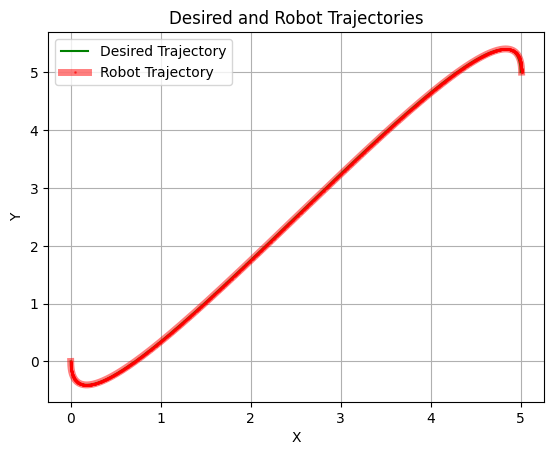

In [ ]:
# Plot the desired and robot trajectories with additional properties
plt.figure()
plt.plot(X_new, Y_new, label='Desired Trajectory', color='green')
plt.plot(x_states, y_states, label='Robot Trajectory', linestyle='-',
         linewidth=5, color='red', alpha=0.5, marker='o', markersize=1,
         markeredgecolor='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Desired and Robot Trajectories')
plt.grid(True)
plt.show()